## SDSS Astroquery

This notebook can retrieve OBJID, ~images~ and other metadata by coordinates from the SDSS DR7 database (https://skyserver.sdss.org/dr7/en/tools/search/), or any other SDSS data release.

The SDSS DR7 database was used in the Galaxy Zoo 1 classification data (https://data.galaxyzoo.org/)

Unfortunately, no astroquery API exists to get files or metadata from the DESI Legacy Imaging Surveys (Jia et al 2023 used DESI DR9, DESI DR8 is available on galahad).

In [1]:
import numpy as np
import astropy.units as u
from astroquery.sdss import SDSS
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
from astropy.wcs import WCS

In [2]:
def get_sdss_7_image(coords):
    xid = SDSS.query_crossid(coords, radius='5 arcsec',data_release=7)
    if len(xid)> 0:
        print(xid['objID','ra','dec'])
        galaxy = xid[0]
        galaxy_coords = SkyCoord(galaxy['ra'], galaxy['dec'],unit=u.deg)
        img = SDSS.get_images(coordinates=galaxy_coords, show_progress=True)
        return img[0]
    else:
        print("Not found")
        return -1
    
search_position = SkyCoord('12:45:00.61 +37:36:40.8',unit=(u.hourangle,u.deg))
found_image = get_sdss_7_image(search_position)
print(found_image.info())

      objID             ra          dec    
------------------ ------------ -----------
587739098065469523 191.25254379 37.61132675
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      96   (2048, 1489)   float32   
  1                1 ImageHDU         6   (2048,)   float32   
  2                1 BinTableHDU     27   1R x 3C   [49152E, 2048E, 1489E]   
  3                1 BinTableHDU     79   1R x 31C   [J, 3A, J, A, D, D, 2J, J, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, E, E]   
None


-0.07495117 145.75


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


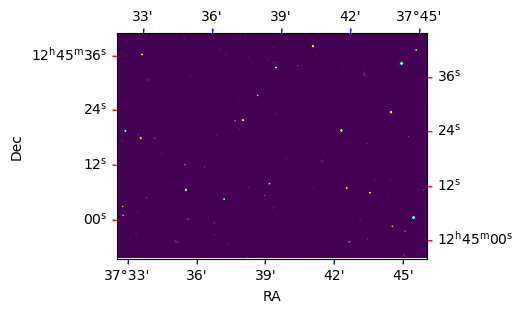

In [3]:
def plot_image(image):
    hdu = image
    wcs = WCS(hdu.header)
    fig = plt.figure(figsize=(4,4))
    ax = fig.add_subplot(projection=wcs) 
    ax.imshow(hdu.data,vmin=0,vmax=1)

    lon, lat = ax.coords
    lon.set_ticks(color='red')
    lon.set_ticks_position('lbtr')
    lon.set_ticklabel_position('lbtr')
    lat.set_ticks(color='blue')
    lat.set_ticks_position('lbtr')
    lat.set_ticklabel_position('lbtr')
    ax.set_xlabel("RA")
    ax.set_ylabel("Dec")
    plt.show()

primary_image = found_image[0]
#print(primary_image.header)
print(np.min(primary_image.data),np.max(primary_image.data))
plot_image(primary_image)


In [4]:
# sql = """SELECT TOP 10
# p.objid,p.ra,p.dec,p.u,p.g,p.r,p.i,p.z,
# p.run, p.rerun, p.camcol, p.field,
# s.specobjid, s.class, s.z as redshift,
# s.plate, s.mjd, s.fiberid
# FROM PhotoObj AS p
# JOIN SpecObj AS s ON s.bestobjid = p.objid
# WHERE 
#   p.u BETWEEN 0 AND 19.6
#   AND g BETWEEN 0 AND 20"""
# img = SDSS.query_sql(sql)
# print(img)

In [5]:
# SkyView.get_image_list(pos,
#                        survey='SDSSdr7g') 
# img = SDSS.get_images(coordinates=pos,
#                       radius='5 arcsec',
#                       run = galaxy['run'],
#                       rerun = galaxy['rerun'],
#                       camcol = galaxy['camcol'],
#                       field = galaxy['field'],
#                       data_release=7,
#                      show_progress=True)